<h1 align="center"><b>CS116.M12.KHCL - LẬP TRÌNH PYTHON CHO MÁY HỌC</b></h1>
<h1 align="center"><b>Bài tập 4</b></h1>

**Sinh viên thực hiện:**
- Thái Trần Khánh Nguyên - 19520188

#Principal component analysis (PCA) exercise#

##Assignment 1: Implement PCA from scratch##

Please implement PCA algorithm with the following guidelines:
- U_k, X_avg, Z = PCA (X, K), where X is the input data matrix (each column is a sample), K is the number of remained components after removing less important components. For the output, Uk is the matrix made by K basis vectors (u_1, u_2, ..., u_k), Z is the output data after removing redundant components. X_avg is the new origin.
- X_reconstruct = decode (U_k, X_avg, X): restore the data (approximately) from U_k, X_avg, Z matrices.

In [ ]:
import numpy as np
from numpy.linalg import eig

def PCA_recode(X, K):                                                                  #K is the number of new components                                                                            

  # Centering the data by subtracting the mean
  X_mean = np.mean(X, axis = 0)
  X_avg = X - X_mean
  
  # Calculate the covariance matrix                                       
  covariance_matrix = np.cov(X_avg, rowvar= False)                               #Calculate the covariance matrix

  #TODO: Calculate eigenvalues and eigenvectors
  eigen_values , eigen_vectors = eig(covariance_matrix)

  #TODO: Sort the eigenvalues in descending order
  sorted_vector = eigen_vectors[:, np.argsort(eigen_values)[::-1]]

  #TODO: Select the new basis and transform the data  
  U_k = sorted_vector[:, 0:K]
  Z   = ( (U_k.T).dot(X_avg.T) ).T
  
  return (U_k, X_mean, Z)

In [ ]:
def decode_PCA(U_k, X_avg, Z):

  #TODO: decode/restore the data before PCA step
  X_reconstruct = Z.dot(U_k.T) + X_avg
  
  return X_reconstruct

Create dummy dataset and test the code yourself

Note: X and X_reconstruct MUST have the same shape (Please print out)

In [ ]:
# TODO: Create dummy dataset and perform testing
X = np.array([[0, 1, 2, 3, 4, 5], [3, 1, 2, 3, 8, 9], [6, 1, 3, 2, 4, 0], [2, 1, 2, 3, 4, 5]])
num_component = 2

U_k, X_avg, Z = PCA_recode(X, 2)
X_reconstruct = decode_PCA(U_k, X_avg, Z)
X_reconstruct

array([[0.17694957, 1.        , 1.91545123, 3.08454877, 3.7358468 ,
        5.15859067],
       [3.04021263, 1.        , 1.98078589, 3.01921411, 7.93996992,
        9.03604049],
       [6.0514842 , 1.        , 2.97540019, 2.02459981, 3.92314355,
        0.0461426 ],
       [1.7313536 , 1.        , 2.1283627 , 2.8716373 , 4.40103973,
        4.75922624]])

##Assignment 2: PCA for image compression##

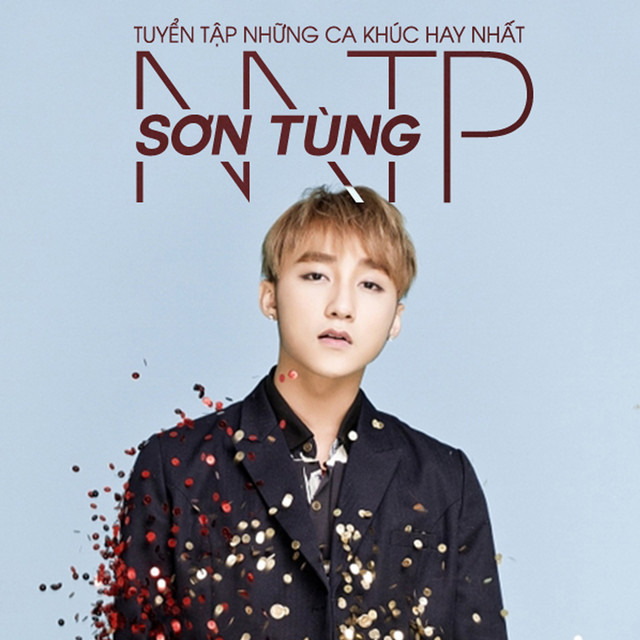

In [ ]:
# Download a random online image (RGB) for PCA
# Or you can select your own image (MUST be in RGB format)
import cv2
import numpy as np
import urllib.request
from google.colab.patches import cv2_imshow

req = urllib.request.urlopen('https://i.scdn.co/image/ab67616d0000b2736e6385f2c42c74af67f3e08c')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1)
cv2_imshow(img)

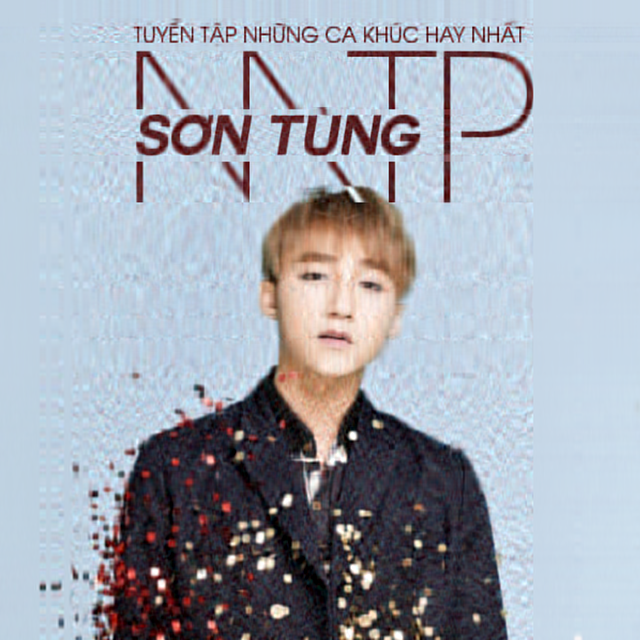

In [ ]:
# Compress the image with K = 50
# You can test with other value of K. It is your choice :D
num_component = 50

# Split image channel
blue, green, red = cv2.split(img)

# TODO: Perform image compression using functions given in Assignment 1
U_k, X_avg, Z = PCA_recode(blue, num_component)
blue_compress  = decode_PCA(U_k, X_avg, Z)

U_k, X_avg, Z = PCA_recode(red, num_component)
red_compress   = decode_PCA(U_k, X_avg, Z)

U_k, X_avg, Z = PCA_recode(green, num_component)
green_compress = decode_PCA(U_k, X_avg, Z)

img_compressed = np.dstack((blue_compress, green_compress, red_compress))

# Show the result image
cv2_imshow(img_compressed)

### Dùng thư viện có sẵn của sklearn

In [ ]:
from sklearn.decomposition import PCA

def PCA_recode2(X, num_component):
  mean_x =  np.mean(blue, axis = 0)
  pca_x = PCA(n_components=50)
  new_x = pca_x.fit_transform(X.T)

  return mean_x, pca_x, new_x

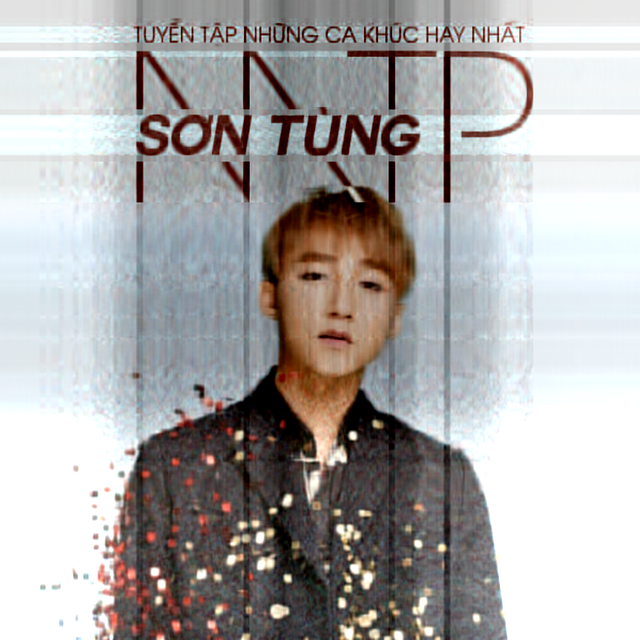

In [ ]:
num_component = 50
blue, green, red = cv2.split(img)

mean, pca, new = PCA_recode2(blue, num_component)
blue_recover = (new.dot(pca.components_)).T + mean

mean, pca, new = PCA_recode2(red, num_component)
red_recover = (new.dot(pca.components_)).T + mean

mean, pca, new = PCA_recode2(green, num_component)
green_recover = (new.dot(pca.components_)).T + mean


img_compressed2 = np.dstack((blue_recover, green_recover, red_recover))

# Show the result image
cv2_imshow(img_compressed2)

##Assignment 3: PCA for sound compression##


In [ ]:
# Download a random online WAV sound file
# Save the file with name "test.wav"
!wget -O test.wav https://file-examples-com.github.io/uploads/2017/11/file_example_WAV_1MG.wav

--2021-10-06 07:46:55--  https://file-examples-com.github.io/uploads/2017/11/file_example_WAV_1MG.wav
Resolving file-examples-com.github.io (file-examples-com.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to file-examples-com.github.io (file-examples-com.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1073218 (1.0M) [audio/wav]
Saving to: ‘test.wav’

test.wav            100%[===================>]   1.02M  --.-KB/s    in 0.03s   

2021-10-06 07:46:55 (33.9 MB/s) - ‘test.wav’ saved [1073218/1073218]



In [ ]:
import numpy as np
from scipy.io.wavfile import read
import librosa
import IPython.display as ipd

# Read the WAV file
WAV = read("/content/test.wav")

x, sr = librosa.load('test.wav') 
ipd.Audio(x, rate=sr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  import sys


In [ ]:
WAV[1].shape

(268237, 2)

In [ ]:
import numpy as np
from scipy.io.wavfile import read

# Read the WAV file
WAV = read("test.wav")

# TODO: Perform sound compression using functions given in Assignment 1
num_component = 100
U_k, X_avg, Z = PCA_recode(WAV[1], num_component)
WAV_compress  = decode_PCA(U_k, X_avg, Z)

# TODO: Save the compressed sound file with name "result.wav"
# Hint: Using scipy library
from scipy.io.wavfile import write
write("example.wav", WAV[0], WAV_compress.astype(np.int16))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """


In [ ]:
x, sr = librosa.load('example.wav') 
ipd.Audio(x, rate=sr)

##To do:##
Please write down your comments on PCA for image and sound compression

###Your answer goes here:###

#Submission note:#

*   You must keep the cells' output.
*   You must submit the original image/sound and the compressed image/sound file in the attachment.

